# Технологии машинного обучения в кибербезопасности
# Тема 1. Методы машинного обучения в задачах кибербезопасности

## Задание 1. Разбиение выборки на обучающую и тестовую

### Импорт библеотек

In [116]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка и чтение датафрейма с последующим анализом

In [130]:
spambase = "spambase/spambase.DATA"
df = pd.read_csv(spambase, header = None)
print(f'\n\n{"Вывод первых 5 строк датафрейма":-^50}')
display(df.head())
df.rename(columns={57: 'class'}, inplace=True)

print(f'{"Информация о датасете":-^50}\n')
print(df.info())
print(f'\n\n{"Статистика распределения меток классов":-^50}\n')
print(df['class'].describe())  
print(f'\n\n{"Вывод первых 5 строк датафрейма":-^50}')
display(df.head())



---------Вывод первых 5 строк датафрейма----------


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


--------------Информация о датасете---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null 

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Анализ датасета на предмет сбалансированности классов

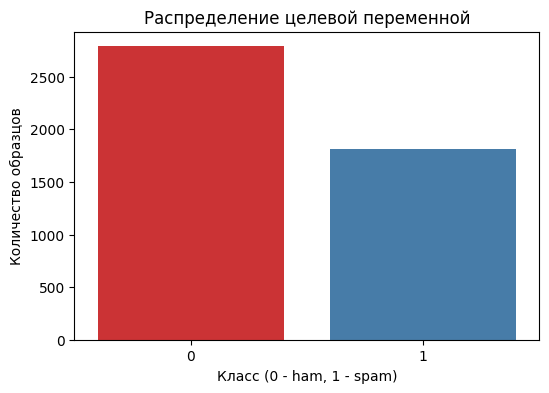

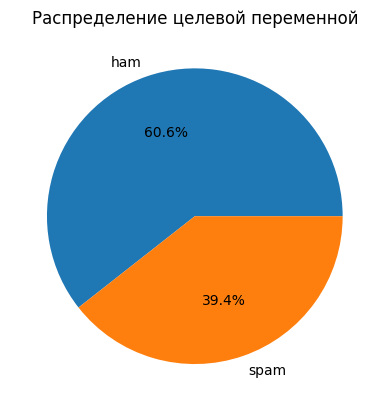

In [118]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['class'], palette='Set1')
plt.title('Распределение целевой переменной')
plt.xlabel('Класс (0 - ham, 1 - spam)')
plt.ylabel('Количество образцов')
plt.show()

class_counts = df['class'].value_counts()
plt.pie(class_counts, labels=['ham', 'spam'], autopct='%1.1f%%')
plt.title('Распределение целевой переменной')
plt.show()

### Распределенеие данных на тренироваочную и тетсовую выборки

In [121]:
spam = df[df['class'] == 1]
ham = df[df['class'] == 0]
spam_train, spam_test = train_test_split(spam, train_size=0.6, random_state=42)
ham_train, ham_test = train_test_split(ham, train_size=0.6, random_state=42)

In [122]:
X_train = pd.concat([ham_train, spam_train], ignore_index=True)
y_train = X_train.pop('class')
X_test = pd.concat([ham_test, spam_test], ignore_index=True)
y_test = X_test.pop('class')

### Обучение модели с использованием **байесовского классификатора** c последующей оценкой

In [123]:
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)
train_accuracy_bayes = spam_bayes.score(X_train, y_train)
test_accuracy_bayes = spam_bayes.score(X_test, y_test)
print(f"Точность на тренировочной выборке: {train_accuracy * 100:.2f}%")
print(f"Точность на тестовой выборке: {test_accuracy * 100:.2f}%")

Точность на тренировочной выборке: 92.90%
Точность на тестовой выборке: 92.24%


### Обучение модели с использованием **логистической регрессией** c последующей оценкой

In [124]:
spam_logreg = LogisticRegression(solver='liblinear')
spam_logreg.fit(X_train, y_train)
train_accuracy_logreg = spam_logreg.score(X_train, y_train)
test_accuracy_logreg = spam_logreg.score(X_test, y_test)
print(f"Точность на тренировочной выборке: {train_accuracy * 100:.2f}%")
print(f"Точность на тестовой выборке: {test_accuracy * 100:.2f}%")

Точность на тренировочной выборке: 92.90%
Точность на тестовой выборке: 92.24%


### Визуализация точности обучения моделей

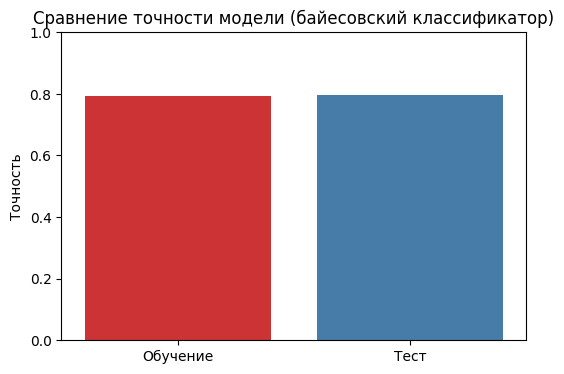

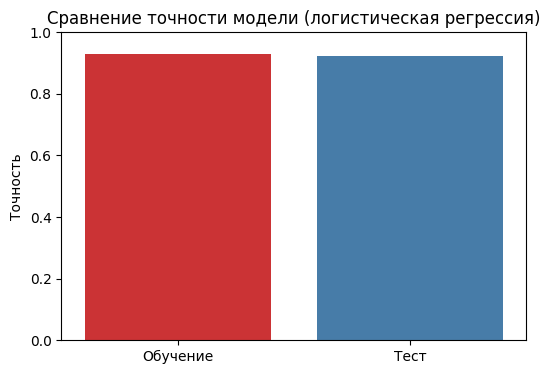

In [126]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Обучение', 'Тест'], y=[train_accuracy_bayes, test_accuracy_bayes], palette='Set1')
plt.title('Сравнение точности модели (байесовский классификатор)')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Обучение', 'Тест'], y=[train_accuracy_logreg, test_accuracy_logreg], palette='Set1')
plt.title('Сравнение точности модели (логистическая регрессия)')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.show()